- https://www.kaggle.com/gimunu/data-augmentation-with-keras-into-cnn
- 思路：先分析样本类别，处理不平衡问题；将图像归一化到64*64大小，设计一个较小的Conv+FC的网络，训练网络进行分类

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from subprocess import check_output

data_path= "M:/dataset/Whale_Identification"

# print(check_output(["ls", data_path]).decode("utf8"))

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_images=glob(data_path+"/train/*jpg")
test_images=glob(data_path+"/test/*jpg")
type(train_images)
print(len(train_images))

9850


In [3]:
df=pd.read_csv(data_path+"/train.csv")
type(df)

pandas.core.frame.DataFrame

In [4]:
df["Image"]=df["Image"].map(lambda x: data_path+"/train\\"+x)
ImageToLabelDict=dict(zip(df["Image"],df["Id"]))


In [5]:
#print(ImageToLabelDict)
 
# print(train_images)

In [6]:
SIZE=64
def ImportImage(filename):
    img=Image.open(filename).convert("LA").resize((SIZE,SIZE))
    return np.array(img)[:,:,0]

train_img=np.array([ImportImage(img) for img in train_images])
x=train_img

In [7]:
print(x.shape)
# print(train_img)

(9850, 64, 64)


In [8]:
print("%d training images" % x.shape[0])

9850 training images


In [9]:
print("Nbr of samples/class\tNbr of classes")
for index, val in df["Id"].value_counts().value_counts().sort_index().iteritems():
    #print(type(index),type(val))
    print("%s\t\t\t%d" %(index,val))
    pass
    
for index, val in df["Id"].value_counts().sort_index().iteritems():
    #print( "%s\t\t\t%d" %(index,val))
    pass

Nbr of samples/class	Nbr of classes
1			2220
2			1034
3			492
4			192
5			102
6			61
7			40
8			23
9			21
10			9
11			7
12			7
13			9
14			5
15			4
16			5
17			4
18			2
19			2
20			1
21			3
22			3
23			1
26			1
27			1
34			1
810			1



- We read that the classes are very unbalanced: one class has ~800 samples while ~2000 have only one example in the training set. This calls for a lot of data augmentation.


In [10]:
class LabelOneHotEncoder():
    def __init__(self):
        self.ohe = OneHotEncoder()
        self.le = LabelEncoder()
    def fit_transform(self, x):
        features = self.le.fit_transform(x)
        return self.ohe.fit_transform( features.reshape(-1,1))
    def transform( self, x):
        return self.ohe.transform( self.la.transform( x.reshape(-1,1)))
    def inverse_tranform( self, x):
        return self.le.inverse_transform( self.ohe.inverse_tranform( x))
    def inverse_labels( self, x):
        return self.le.inverse_transform( x)

y = list(map(ImageToLabelDict.get, train_images))
lohe = LabelOneHotEncoder()
#print(train_images)
#print(y)
y_cat = lohe.fit_transform(y)

In [20]:
print(y,len(y))
print(y_cat)

[[ 0.00088625  0.00023468  0.00022535 ...,  0.00025113  0.0002568
   0.00022847]] 1
  (0, 3741)	1.0
  (1, 310)	1.0
  (2, 3613)	1.0
  (3, 418)	1.0
  (4, 4012)	1.0
  (5, 2332)	1.0
  (6, 3889)	1.0
  (7, 0)	1.0
  (8, 991)	1.0
  (9, 1341)	1.0
  (10, 651)	1.0
  (11, 1811)	1.0
  (12, 2530)	1.0
  (13, 4197)	1.0
  (14, 1589)	1.0
  (15, 2862)	1.0
  (16, 2030)	1.0
  (17, 3336)	1.0
  (18, 3834)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 2104)	1.0
  (22, 2863)	1.0
  (23, 3140)	1.0
  (24, 3013)	1.0
  :	:
  (9825, 2698)	1.0
  (9826, 741)	1.0
  (9827, 4035)	1.0
  (9828, 389)	1.0
  (9829, 1309)	1.0
  (9830, 2995)	1.0
  (9831, 1082)	1.0
  (9832, 256)	1.0
  (9833, 898)	1.0
  (9834, 3896)	1.0
  (9835, 3941)	1.0
  (9836, 2305)	1.0
  (9837, 0)	1.0
  (9838, 2703)	1.0
  (9839, 1918)	1.0
  (9840, 2880)	1.0
  (9841, 4189)	1.0
  (9842, 1080)	1.0
  (9843, 1618)	1.0
  (9844, 0)	1.0
  (9845, 732)	1.0
  (9846, 2942)	1.0
  (9847, 2337)	1.0
  (9848, 746)	1.0
  (9849, 3088)	1.0


In [30]:
#constructing class weights
WeightFunction = lambda x : 1./x**0.75
ClassLabel2Index = lambda x : lohe.le.inverse_tranform( [[x]])
CountDict = dict( df["Id"].value_counts())
class_weight_dic = { lohe.le.transform( [image_name])[0] : WeightFunction(count) for image_name, count in CountDict.items()}
del CountDict

In [33]:
print(df["Id"].value_counts())

new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
w_fd1cb9d     22
w_ab4cae2     22
w_693c9ee     22
w_73d5489     21
w_987a36f     21
w_43be268     21
w_f19faeb     20
w_95874a5     19
w_9b401eb     19
w_b7d5069     18
w_c0d494d     18
w_0e737d0     17
w_dbda0d6     17
w_18eee6e     17
w_eb0a6ed     17
w_a59905f     16
w_17ee910     16
w_6c803bf     16
w_67de30b     16
w_b0e05b1     16
w_9ca943b     15
w_ee17a08     15
w_cae7677     15
w_89e159a     15
w_2d99a0c     14
            ... 
w_f96592f      1
w_4057481      1
w_8166c79      1
w_5ffa454      1
w_001ebbc      1
w_6e26345      1
w_1a536b2      1
w_80618a3      1
w_0d0bc48      1
w_43c0762      1
w_6737f89      1
w_adffd9c      1
w_2c717fb      1
w_83accca      1
w_b2e1722      1
w_2341d0a      1
w_771d855      1
w_95af6a2      1
w_94b4478      1
w_dba0cd8      1
w_bb6afc8      1
w_2663598      1
w_50e125b      1
w_93dcf76      1
w_d7b85ec      1
w_7abaf06      1
w_af06773      1
w_16d2ae2     

In [12]:
def plotImages( images_arr, n_images=4):
    fig, axes = plt.subplots(n_images, n_images, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        if img.ndim != 2:
            img = img.reshape( (SIZE,SIZE))
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()

(9850, 64, 64)


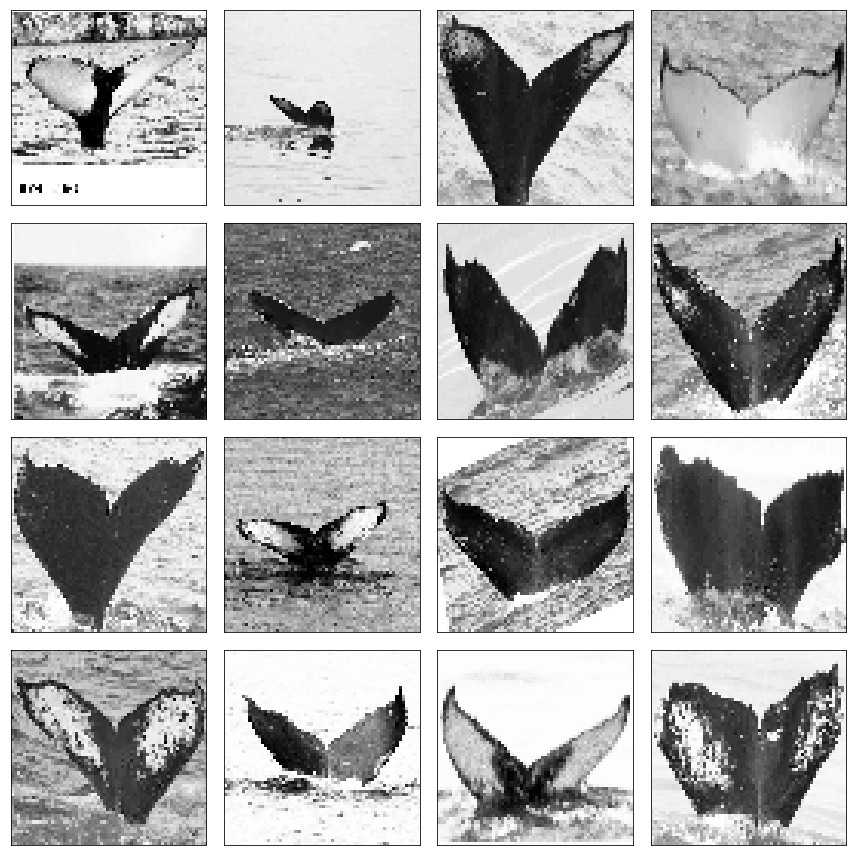

In [13]:
% matplotlib inline
plotImages( x)
print(x.shape)

In [14]:
#use of an image generator for preprocessing and data augmentation

print(type(x))
x = x.reshape( (-1,SIZE,SIZE,1))
input_shape = x[0].shape
x_train = x.astype("float32")
y_train = y_cat

<class 'numpy.ndarray'>


In [15]:
image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)

#training the image preprocessing
image_gen.fit(x_train, augment=True)

In [27]:
type(x_train)
print(x.shape)
print(type(y_train))

(1, 64, 64)
<class 'scipy.sparse.csr.csr_matrix'>


In [28]:
batch_size = 128
num_classes = len(y_cat.toarray()[0])
epochs = 50

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

model = Sequential()
model.add(Conv2D(48, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(48, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.33))
model.add(Flatten())
model.add(Dense(36, activation='sigmoid'))
model.add(Dropout(0.33))
model.add(Dense(36, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()
model.fit_generator(image_gen.flow(x_train, y_train.toarray(), batch_size=batch_size),
          steps_per_epoch=  x_train.shape[0]//batch_size,
          epochs=epochs,
          verbose=1,
          class_weight=class_weight_dic)

x_train shape: (9850, 64, 64, 1)
9850 train samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 48)        480       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 48)        20784     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 48)        57648     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 48)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)     

In [ ]:
model.predict_proba

In [ ]:

import warnings
from os.path import split

with open("submission_method1.csv","w") as f:
    with warnings.catch_warnings():
        f.write("Image,Id\n")
        warnings.filterwarnings("ignore",category=DeprecationWarning)
        for image in test_images:
            img = ImportImage( image)
            x = img.astype( "float32")
            #applying preprocessing to test images
            x = image_gen.standardize( x.reshape(1,SIZE,SIZE))
            
            y = model.predict_proba(x.reshape(1,SIZE,SIZE,1))
            predicted_args = np.argsort(y)[0][::-1][:5]
            predicted_tags = lohe.inverse_labels( predicted_args)
            image = split(image)[-1]
            predicted_tags = " ".join( predicted_tags)
            f.write("%s,%s\n" %(image, predicted_tags))


1/1 [==============================] - 0s
